<a href="https://colab.research.google.com/github/KishoreKannaG/Internship/blob/main/Clustering_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Data Cleaning**

In [ ]:
df = pd.read_csv("/content/drive/Othercomputers/Dell G15/book/Mall_Customers.csv")
df.head(4)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [ ]:
gender = pd.get_dummies(df["Genre"])
df["Gender"] = gender["Male"]
df.drop(["Genre","CustomerID"],axis=1,inplace=True)
df.head()

,Age,Annual_Income_(k$),Spending_Score,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 200 non-null    int64
 1   Annual_Income_(k$)  200 non-null    int64
 2   Spending_Score      200 non-null    int64
 3   Gender              200 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 5.0 KB


In [ ]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score,Gender
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


In [ ]:
df.isnull().sum()

Age                   0
Annual_Income_(k$)    0
Spending_Score        0
Gender                0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

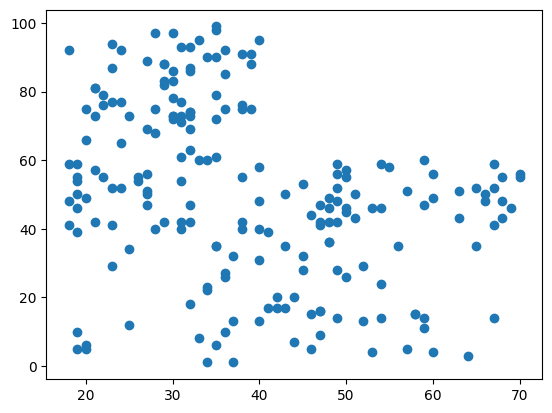

In [ ]:
plt.scatter(df["Age"],df["Spending_Score"])
plt.show()

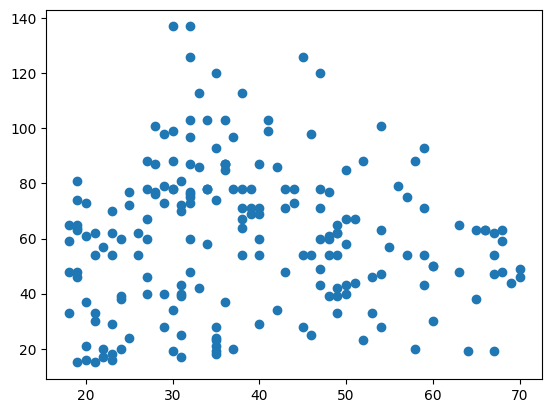

In [ ]:
plt.scatter(df["Age"],df["Annual_Income_(k$)"])
plt.show()

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Annual_Income_(k$)', ylabel='Age'>,
        <Axes: xlabel='Spending_Score', ylabel='Age'>,
        <Axes: xlabel='Gender', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Annual_Income_(k$)'>,
        <Axes: xlabel='Annual_Income_(k$)', ylabel='Annual_Income_(k$)'>,
        <Axes: xlabel='Spending_Score', ylabel='Annual_Income_(k$)'>,
        <Axes: xlabel='Gender', ylabel='Annual_Income_(k$)'>],
       [<Axes: xlabel='Age', ylabel='Spending_Score'>,
        <Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>,
        <Axes: xlabel='Spending_Score', ylabel='Spending_Score'>,
        <Axes: xlabel='Gender', ylabel='Spending_Score'>],
       [<Axes: xlabel='Age', ylabel='Gender'>,
        <Axes: xlabel='Annual_Income_(k$)', ylabel='Gender'>,
        <Axes: xlabel='Spending_Score', ylabel='Gender'>,
        <Axes: xlabel='Gender', ylabel='Gender'>]], dtype=object)

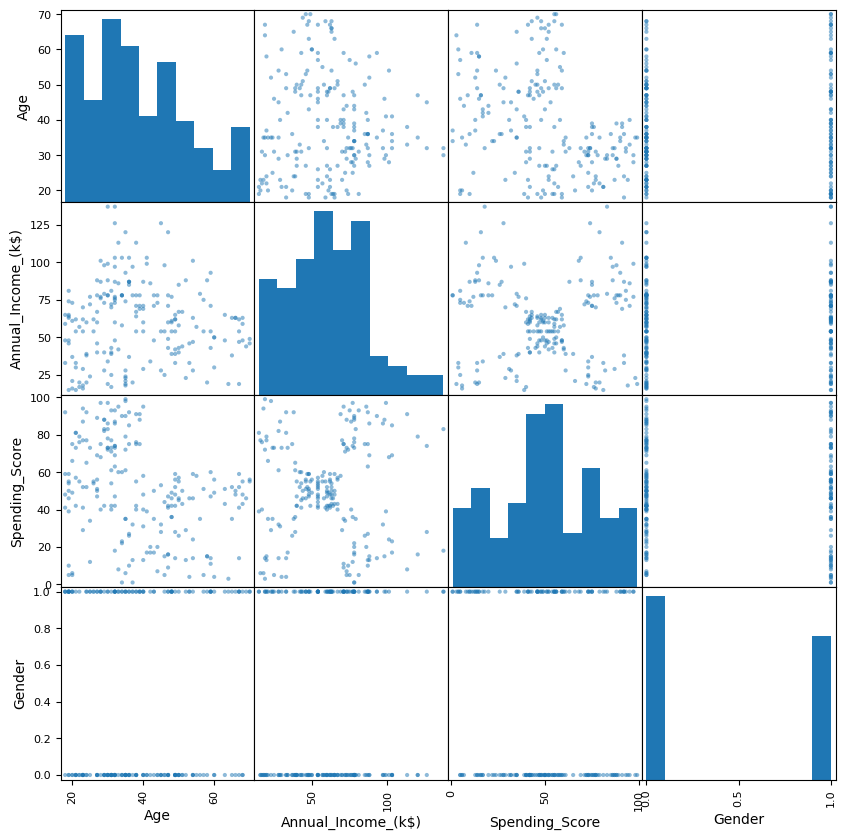

In [ ]:
pd.plotting.scatter_matrix(df, figsize = (10, 10))

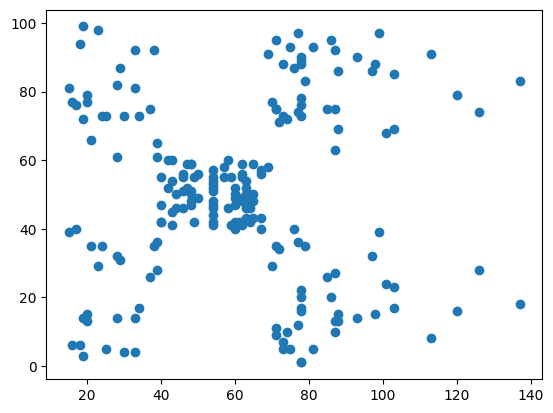

In [ ]:
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"])

So we see "Annual_Income" and "Spending_Score" has some clustering values

# **Model (KMeans)**

In [ ]:
df1 = pd.DataFrame()
df1["Income"]=df["Annual_Income_(k$)"]
df1["Spending"]=df["Spending_Score"]
df1.head()
df1.shape

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,n_init="auto")
kmeans.fit(df1)


In [ ]:
labels = kmeans.predict(df1)
centroids = kmeans.cluster_centers_


In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42, n_init = 'auto')
y_kmeans = kmeans.fit_predict(X)

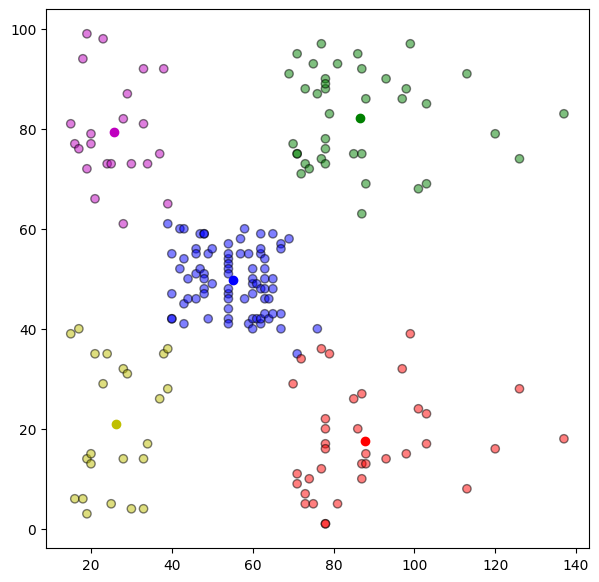

In [ ]:
fig = plt.figure(figsize=(7,7))

colmap = {1:"g",2:"b",3:"r",4:"y",5:"m"}

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df1["Income"],df1["Spending"],color=colors1, alpha=0.5,edgecolor='k')
for idx, centroid in enumerate(centroids):
	plt.scatter(*centroid,color=colmap[idx+1])

plt.show()

# **KMeans but from scratch**

In [ ]:
k = 3
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"],color = 'k')

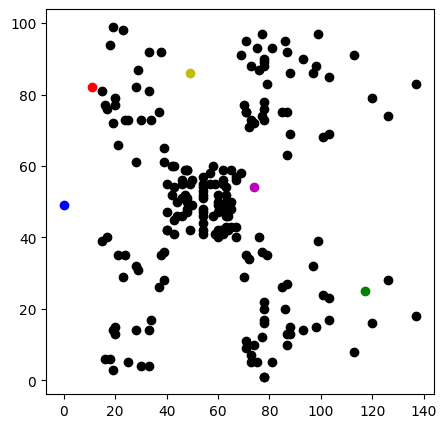

In [ ]:
k=5
centroids = {
	i+1:[np.random.randint(0,140),np.random.randint(0,100)]
	for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"],color='k')
colmap = {1:"g",2:"b",3:"r",4:"y",5:"m"}
for i in centroids.keys():
	plt.scatter(*centroids[i], color=colmap[i])
plt.show()


# **KNN from scratch**

In [ ]:
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i]-row2[i])
	return sqrt(distance)
